## Step 1: Reading and Understanding the Data

In [166]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [167]:
#load the data into dataframe
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [168]:
bike.shape

(730, 16)

In [169]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data visualizing

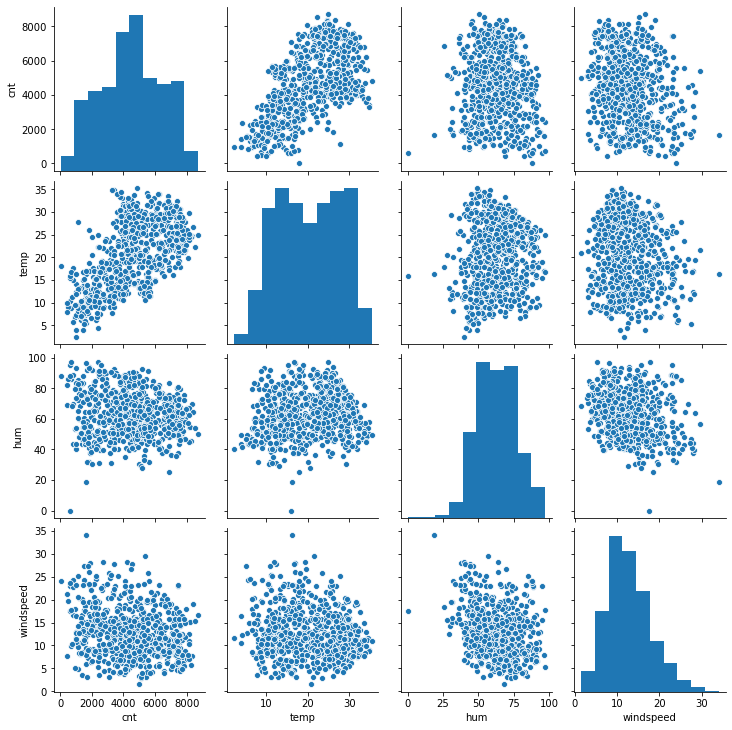

In [170]:
# visualizing numeric variables
sns.pairplot(bike[['cnt','temp','hum','windspeed']])
plt.show()

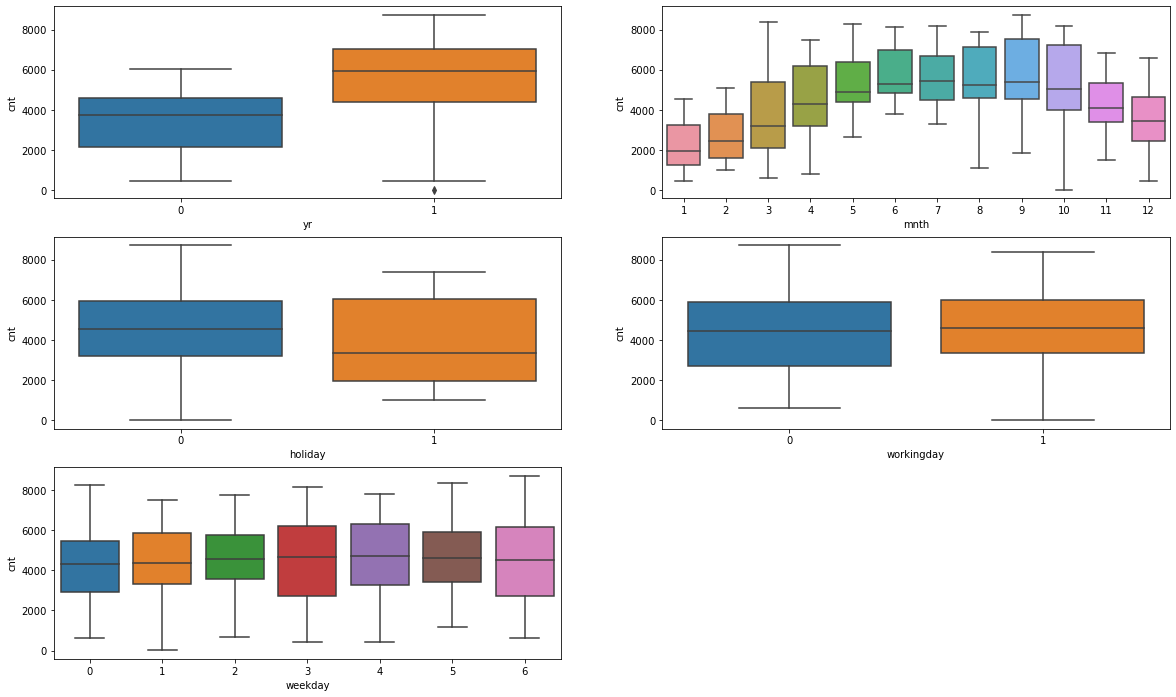

In [171]:
# visualizing categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(3,2,2)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,2,3)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,2,4)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(3,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.show()

- Infer from pictures
    - By increase in year the count increases
    - people tend to rent bikes more during mid year
    - people prefer to take bikes during non-holidays, does that mean bikes are taken to go to office or work?
    - there is a constant usage of bikes during all the days in a week around 4k on average

## Data preparation
- We can see that season,weathersit,mnth and weekday are categorical variables but represented numerically.
- Here year(yr) has two values 2018 and 2019 which are represented as 0 and 1 respectively and 
  should remember that year is a categorical variable
- Temp and atemp looks like directly proportional i.e highly correlated so we can drop one after checking the correlation.

In [172]:
bike[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


- We can see high correlation between them so drop any one of those

In [173]:
# dropping those columns which are redundant and not useful for analysis
bike=bike.drop(['instant','dteday','atemp','casual','registered'],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


- As season,weathersit,mnth and weekday having more than 2 categorical represented in number so we need to create dummy    
variables
- Rest of the variables which are categorical in nature and having numeric type should be remebered and not used for scaling

In [174]:
# Assigning categorical names
bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit']=bike['weathersit'].map({1:'clear_clouds',2:'mist_cloudy',3:'light_snow',4:'heavy_rain'})
bike['mnth']=bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# according to the weekday's checked in the calender 0 represents tuesday and so on
bike['weekday']=bike['weekday'].map({0:'tue',1:'wed',2:'thu',3:'fri',4:'sat',5:'sun',6:'mon'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_clouds,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear_clouds,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_clouds,9.305237,43.6957,12.522300,1600


In [175]:
# create dummy variables for season and weathersit
bike = pd.get_dummies(data=bike,columns=['season','weathersit','mnth','weekday'])
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [176]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   hum                      730 non-null    float64
 5   windspeed                730 non-null    float64
 6   cnt                      730 non-null    int64  
 7   season_fall              730 non-null    uint8  
 8   season_spring            730 non-null    uint8  
 9   season_summer            730 non-null    uint8  
 10  season_winter            730 non-null    uint8  
 11  weathersit_clear_clouds  730 non-null    uint8  
 12  weathersit_light_snow    730 non-null    uint8  
 13  weathersit_mist_cloudy   730 non-null    uint8  
 14  mnth_apr                 7

#### Remember
- Numerical variables are those columns except the categorical and 'dummy' variables
- 'temp','hum','windspeed'
- cnt is dependent variable

## Splitting the data into train and test sets
- 70% for training 
- 30% for testing

In [177]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train, bike_test=train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)
bike_train.shape

(510, 33)

In [178]:
bike_test.shape

(219, 33)

## Scaling using Min-Max scalar

- As we can see there are independent variables which are scaled on their individual range so there is need to normalize all the variables.

In [179]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
# Apply scaling for all the variables which are numerical and not in range of 0 to 1
vars=['temp','hum','windspeed']
# As this for training data we can use fit_transform method
bike_train[vars]=scaler.fit_transform(bike_train[vars])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,1,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,0,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1796,0,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Divide the training data into X and Y variables
- Y consists of dependent variable 
- X consists of independent variables

In [180]:
bike_train_y=bike_train.pop('cnt')
bike_train_X=bike_train

In [181]:
bike_train_y.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [182]:
bike_train_X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## Building Linear regression model(Automated Approach)
- Using Scikit learn with Recursive feature elimination method

In [183]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(bike_train_X,bike_train_y)
# Selecting 15 features out of 32 and then filter it to around 10 using manual approach
rfe=RFE(model,15)
rfe=rfe.fit(bike_train_X,bike_train_y)

In [184]:
list(zip(bike_train_X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 18),
 ('windspeed', True, 1),
 ('season_fall', False, 4),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('weathersit_clear_clouds', True, 1),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist_cloudy', False, 2),
 ('mnth_apr', False, 12),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('weekday_fri', False, 17),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 15),
 ('weekday_thu', False, 9),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 7)]

In [185]:
col=bike_train_X.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_clear_clouds', 'weathersit_light_snow',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'weekday_mon'],
      dtype='object')

- As we obtained 15 feature variables using automated approach lets decrease this further using manual approach

# Building the model(Manual approach) to elimate few features
- Using statsmodel for detailed statistics

In [186]:
import statsmodels.api as sm
X_train_lm=bike_train_X[col]               # Filtering with those columns given by RFE model
X_train_lm= sm.add_constant(X_train_lm)    # Adding constant variable
lr = sm.OLS(bike_train_y,X_train_lm).fit() # Fitting the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.30e-188
Time:                        19:50:19   Log-Likelihood:                -4112.5
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8325.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

- We can see the model accuracy is 84%
- The p-value for holiday seems to be high as it is greater then 0.05

In [187]:
# Lets check the VIF values to check the collinarity between the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features']=X_train_lm.columns
vif['VIF']=[variance_inflation_factor(X_train_lm.values,i) for i in range(X_train_lm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,44.32
4,temp,3.27
6,season_spring,2.74
7,season_winter,2.29
3,workingday,1.87
15,weekday_mon,1.77
13,mnth_nov,1.70
11,mnth_jan,1.64
10,mnth_dec,1.44
12,mnth_jul,1.30


- const is not feature so we can drop that
- For all the features we can see the vif is less than 5 which is good

-> Observing both p-values and VIF it is clear that holiday is the feature which has to be removed 

In [188]:
X_train_lm=X_train_lm.drop(['holiday'],axis=1)
X_train_lm.head()

,const,yr,workingday,temp,windspeed,season_spring,season_winter,weathersit_clear_clouds,weathersit_light_snow,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_mon
653,1.0,1,1,0.509887,0.300794,0,1,1,0,0,0,0,0,0,0
576,1.0,1,1,0.815169,0.264686,0,0,1,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,1,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,0,0,0,0,1


In [189]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    510 non-null    float64
 1   yr                       510 non-null    int64  
 2   workingday               510 non-null    int64  
 3   temp                     510 non-null    float64
 4   windspeed                510 non-null    float64
 5   season_spring            510 non-null    uint8  
 6   season_winter            510 non-null    uint8  
 7   weathersit_clear_clouds  510 non-null    uint8  
 8   weathersit_light_snow    510 non-null    uint8  
 9   mnth_dec                 510 non-null    uint8  
 10  mnth_jan                 510 non-null    uint8  
 11  mnth_jul                 510 non-null    uint8  
 12  mnth_nov                 510 non-null    uint8  
 13  mnth_sep                 510 non-null    uint8  
 14  weekday_mon              

In [190]:
# Now lets build the model with the updated feature list
X_train_lm=sm.add_constant(X_train_lm)
lr=sm.OLS(bike_train_y,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          4.64e-189
Time:                        19:50:49   Log-Likelihood:                -4114.1
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

- Now we can see after removing the holiday feature the model accuracy came down to just 0.001% which is negligible.
- All the p-values are less than 0.05 and Adjusted R-squared is nearly 84% which is good

In [191]:
vif= pd.DataFrame()
vif['Features']=X_train_lm.columns
vif['VIF']=[variance_inflation_factor(X_train_lm.values,i) for i in range(X_train_lm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
0,const,43.75
3,temp,3.27
5,season_spring,2.74
6,season_winter,2.29
12,mnth_nov,1.68
2,workingday,1.65
14,weekday_mon,1.64
10,mnth_jan,1.63
9,mnth_dec,1.44
11,mnth_jul,1.30


## Residual analysis for the trainig data
- Check if the error terms are normally distributed or not

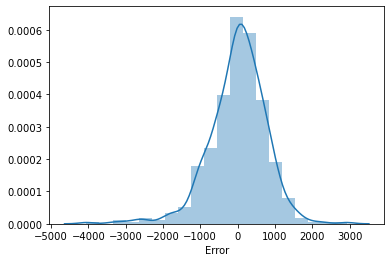

In [192]:
bike_train_y_pred=lr.predict(X_train_lm)
sns.distplot((bike_train_y-bike_train_y_pred),bins=20)
plt.xlabel('Error')
plt.show()

- We can see that the error is distributed across the mean

## Making predictions on test data using the predicted equation

#### Scaling on test set

In [193]:
vars=['temp','hum','windspeed']
# As this is for test data we can use transform method
bike_test[vars]=scaler.transform(bike_test[vars])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
184,0,1,0,0.831783,0.657364,0.084219,6043,1,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,0,...,0,1,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,4780,1,0,0,...,0,0,0,1,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [194]:
# Divide into x and y test sets
bike_test_y=bike_test.pop('cnt')
bike_test_X=bike_test

In [195]:
column_list=X_train_lm.columns
column_list=column_list.drop('const')
bike_test_X=bike_test_X[column_list]
bike_test_X.head()

,yr,workingday,temp,windspeed,season_spring,season_winter,weathersit_clear_clouds,weathersit_light_snow,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_mon
184,0,0,0.831783,0.084219,0,0,0,0,0,0,1,0,0,0
535,1,1,0.901354,0.153728,0,0,1,0,0,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,0,0,0,0,0,0,0
221,0,1,0.881625,0.339570,0,0,1,0,0,0,0,0,0,0
152,0,1,0.817246,0.537414,0,0,1,0,0,0,0,0,0,0


In [196]:
bike_test_X=sm.add_constant(bike_test_X)
bike_test_y_pred=lr.predict(bike_test_X)

In [197]:
from sklearn.metrics import r2_score
r2_score(y_true=bike_test_y, y_pred=bike_test_y_pred)

0.8194293965277095

## Model Evaluation

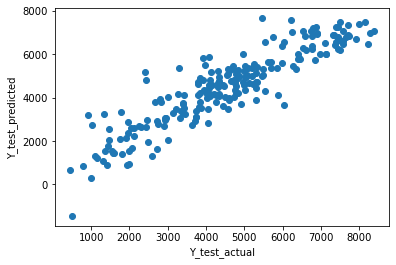

In [198]:
#Plotting predicted y with actual y to check to check the spread
plt.scatter(bike_test_y,bike_test_y_pred)
plt.xlabel('Y_test_actual')
plt.ylabel('Y_test_predicted')
plt.show()

## Summary
1. The list of features which are useful to predict the Count with 84% of training accuracy and 81% of test accuracy are:
       'yr','workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_clear_clouds', 'weathersit_light_snow',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'weekday_mon'